# ANOVA Testing

**Seán O'Neill, 2025**

The purpose of this notebook is to demonstrate the basics of analysis of variance (ANOVA) testing.

In [3]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt

### 1. One-way ANOVA

The one-way ANOVA is useful for testing the effect of one single independent variable on a dependent variable.

In a problem like this, we will have taken $n$ random, independent samples from each of $k$ populations, or groups, so that

$Group \ 1:\ x_{11},\; x_{12},\; ...,\; x_{1n}$ 

$Group \ 2:\ x_{21},\; x_{22},\; ...,\; x_{2n}$

$Group \ k:\ x_{k1},\; x_{k2},\; ...,\; x_{kn}$

We now make the *assumption* that the corresponding random variables, $X_{ij}$, all have normal distributions with means $\mu_i$ and common variance $\sigma$.

This allows us to write, for the $j$th observation from group $i$, the observation $x_{ij} = \mu_i + e_{ij}$, where $e_{ij}$ is normally distributed around zero, with the same common variance $\sigma$.

This can, in turn, be written as $x_{ij} = \mu + \alpha_i + e_{ij}$, with the constraint that $\sum_{i=1}^{k} \alpha_i = 0$. Here $\mu$ is called the **grand mean**, while the $\alpha_i$ are called the **treatment effects**.

The null hypothesis we want to test is that all means are equal. This is equivalent to $H_0$:  $\alpha_i = 0$ for $i = 1, \; 2, \;..., k$.

The alternative hypothesis is that all means are not equal. This is equivalent to $H_0$:  $\alpha_i \neq 0$ for at least one of $i = 1, \; 2, \;..., k$.

The one-way ANOVA test is based on the analysis of the total variablility of the combined data,
$$ \sum\limits_{i=1}^k\sum\limits_{j=1}^n(x_{ij}-\bar{x}_{..})^2$$
where $\bar{x}_{..}$ is the sample mean of the combined data.

In [4]:
#set the default random number generator
rng = np.random.default_rng()

In [5]:
sample_group_one = rng.normal(5, 2, 1000)
sample_group_two = rng.normal(15, 2, 1000)

[]

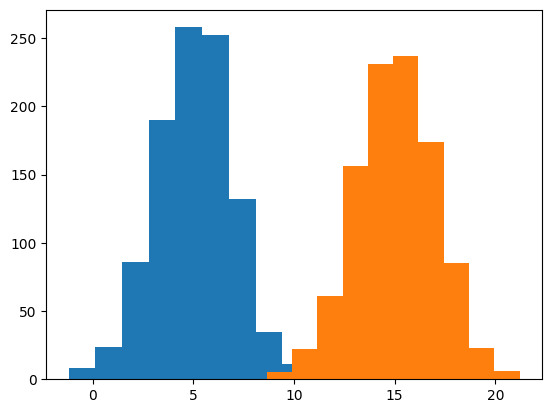

In [6]:
plt.hist(sample_group_one)
plt.hist(sample_group_two)
plt.plot()

In [37]:
class ANOVA:
    def __init__(self, data):
        self.data = data

    def __combine_data(self):
        combined = np.concatenate([self.data[group] for group in self.data])
        return combined

    def __combined_sample_mean(self):
        return np.mean(self.__combine_data())

    def __sample_size(self):
        return np.max(np.array([len(self.data[group]) for group in self.data]))
    
    def __SSTr(self):
        return self.__sample_size() * sum([np.square(np.mean(self.data[group]) 
                    - self.__combined_sample_mean()) for group in self.data])

    def __SSE(self):
        return sum([np.sum(np.square(self.data[group] - np.mean(self.data[group]))) for group in self.data])

    def F_score(self):
        k = len(self.data)
        n = self.__sample_size()

        return (self.__SSTr() / (k-1)) / (self.__SSE() / (k*(n-1)))
        

In [47]:
x = list()
for _ in range(10000):
    sample_group_one = rng.normal(500, 2, 1000)
    sample_group_two = rng.normal(500, 2, 1000)
    
    anova = ANOVA({"A" : sample_group_one,
                   "B" : sample_group_two})

    x.append(anova.F_score())


[]

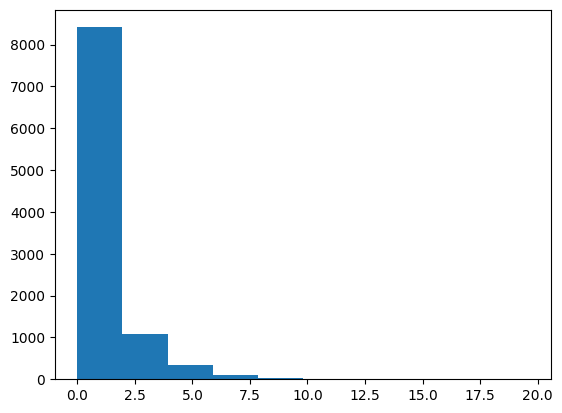

In [48]:
plt.hist(x)
plt.plot()